In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)


n = 200
data = pd.DataFrame({
    'PortOfEntry': np.random.choice(['Laredo', 'Nogales', 'San Ysidro', 'El Paso'], size=n),
    'WaitDays': np.random.poisson(lam=10, size=n),
    'Outcome': np.random.choice(['Admitted', 'Pending', 'Denied'], size=n, p=[0.6, 0.3, 0.1]),
    'TravelGroupSize': np.random.randint(1,6, size=n)
})
data.head()


,PortOfEntry,WaitDays,Outcome,TravelGroupSize
0,San Ysidro,8,Admitted,2
1,El Paso,15,Admitted,3
2,Laredo,9,Admitted,4
3,San Ysidro,7,Admitted,1
4,San Ysidro,8,Admitted,5


In [10]:
# simple cleaning example
data.columns = data.columns.str.lower()
print(data.isna().sum())

# standardize port names
data['portofentry'] = data['portofentry'].str.title()
data.head()


portofentry        0
waitdays           0
outcome            0
travelgroupsize    0
dtype: int64


,portofentry,waitdays,outcome,travelgroupsize
0,San Ysidro,8,Admitted,2
1,El Paso,15,Admitted,3
2,Laredo,9,Admitted,4
3,San Ysidro,7,Admitted,1
4,San Ysidro,8,Admitted,5


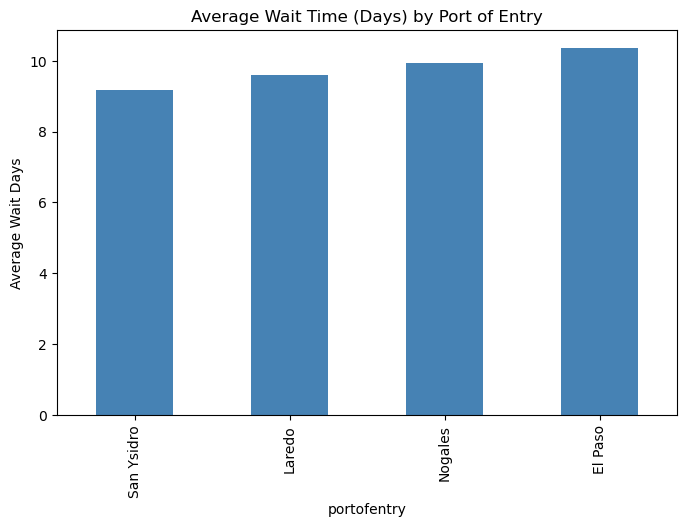

In [12]:
# average wait time by port
avg_wait = data.groupby('portofentry')['waitdays'].mean().sort_values()

plt.figure(figsize=(8,5))
avg_wait.plot(kind='bar', color='steelblue')
plt.title('Average Wait Time (Days) by Port of Entry')
plt.ylabel('Average Wait Days')
plt.show()


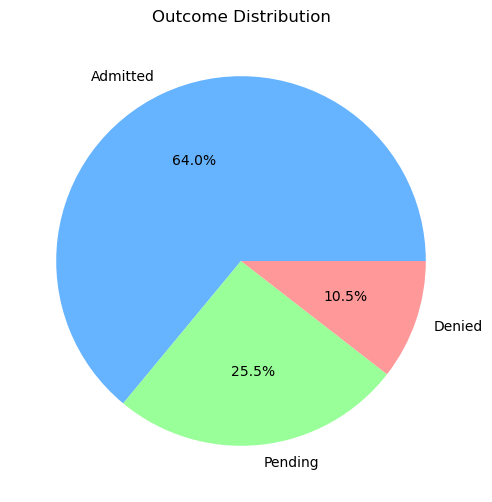

In [13]:
# outcome distribution
outcome_counts = data['outcome'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Outcome Distribution')
plt.show()
